# Recommendation System Revisited

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('data_pivot.csv')

In [4]:
df.dtypes

Cust_Id      int64
4          float64
5          float64
10         float64
12         float64
            ...   
17764      float64
17765      float64
17766      float64
17769      float64
17770      float64
Length: 4794, dtype: object

In [5]:
df.head(5)

,Cust_Id,4,5,10,12,16,18,21,23,24,...,17741,17746,17751,17752,17760,17764,17765,17766,17769,17770
0,192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
1,250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
3,330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.set_index('Cust_Id', inplace = True)

In [7]:
desc = df.describe()

In [8]:
desc

,4,5,10,12,16,18,21,23,24,31,...,17741,17746,17751,17752,17760,17764,17765,17766,17769,17770
count,29159.000000,29159.000000,29159.000000,29159.000000,29159.000000,29159.000000,29159.000000,29159.000000,29159.000000,29159.000000,...,29159.000000,29159.000000,29159.000000,29159.000000,29159.000000,29159.000000,29159.000000,29159.000000,29159.000000,29159.000000
mean,0.000754,0.007613,0.000892,0.001166,0.003429,0.028670,0.001337,0.002709,0.002366,0.000583,...,0.008848,0.002504,0.004253,0.003087,0.001612,0.274049,0.000446,0.001715,0.021228,0.002161
std,0.056166,0.185959,0.058556,0.064674,0.113506,0.339463,0.070018,0.107791,0.093120,0.046479,...,0.183678,0.099180,0.137775,0.100367,0.069521,1.033214,0.038400,0.078114,0.247760,0.082999
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### PCA

(0.0, 50.0)

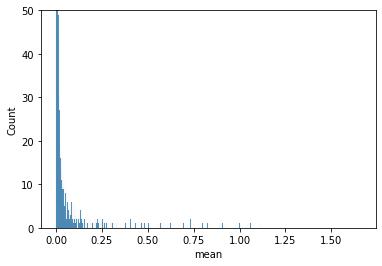

In [9]:
fig, ax = plt.subplots()
sns.histplot(desc.loc['mean'])
ax.set_ylim(0,50) 

PCA assumes normal distribution of features

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [11]:
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

In [12]:
df = pd.DataFrame(df)

In [13]:
desc = df.describe()

(0.0, 50.0)

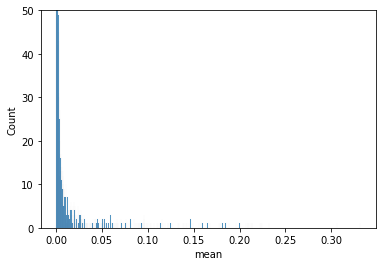

In [14]:
fig, ax = plt.subplots()
sns.histplot(desc.loc['mean'])
ax.set_ylim(0,50) 

In [15]:
df.shape

(29159, 4793)

In [16]:
df

,0,1,2,3,4,5,6,7,8,9,...,4783,4784,4785,4786,4787,4788,4789,4790,4791,4792
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
ind = 1
df[ind][df[ind] > 0]

721      1.0
1754     1.0
2628     1.0
2663     1.0
2855     1.0
3890     1.0
4132     1.0
4402     1.0
4608     1.0
5824     1.0
5923     1.0
6362     0.6
6553     0.8
7039     1.0
7181     1.0
7616     0.6
8157     1.0
8267     0.8
8907     0.8
9171     1.0
9571     0.6
9673     1.0
10094    1.0
10769    1.0
11638    1.0
11684    0.6
11824    0.8
11973    0.8
13427    0.8
13965    1.0
13969    1.0
14478    0.2
15722    0.6
17634    0.6
17667    0.4
17852    0.8
17986    1.0
18656    0.8
20985    0.8
22285    0.8
23303    0.6
23624    1.0
24667    1.0
24911    1.0
26086    1.0
26117    1.0
26306    1.0
26606    0.8
28370    0.8
28644    1.0
29102    1.0
Name: 1, dtype: float64

In [18]:
counts = []
for i in df.columns:
    counts.append(len(df[i][df[i] > 0]))

(0.0, 50.0)

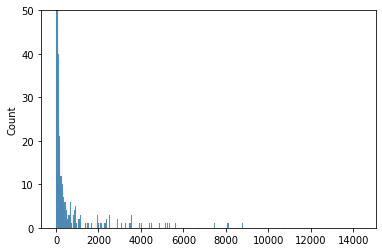

In [19]:
fig, ax = plt.subplots()
sns.histplot(counts)
ax.set_ylim(0,50) 

Need to transform data

In [20]:
# demonstration of the power transform on data with a skew
from numpy import exp
from numpy.random import randn
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot

In [ ]:
%%time
# power transform the raw data
power = PowerTransformer(method='yeo-johnson')
df_trans = power.fit_transform(df)
# histogram of the transformed data
pyplot.hist(df_trans, bins=25)
pyplot.show()